# Atividade da Semana 11

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

> A predição da compra de um veículo pelos clientes é uma ferramenta extremamente valiosa para o time de marketing de uma concessionária. Ao relacionar o desfecho (*output*) "compra" com a informação de salário dos clientes, através de regressão logística, é possível obter *insights* significativos que podem impulsionar as estratégias de marketing e aumentar as chances de sucesso nas vendas.

> Uma das principais vantagens da predição é a capacidade de identificar padrões e tendências no comportamento dos clientes. Ao analisar a relação entre o salário e a decisão de compra, o time de marketing pode compreender melhor quais faixas salariais têm maior probabilidade de adquirir um veículo. Essas informações são extremamente valiosas para direcionar os esforços de marketing de forma mais eficiente, direcionando recursos para os clientes com maior potencial de conversão.

> Além disso, a predição da compra também auxilia na personalização das campanhas e na segmentação de mercado. Com base nos resultados da regressão logística, é possível identificar características e preferências específicas dos clientes que estão mais propensos a comprar um automóvel. Isso permite que o time de marketing crie campanhas direcionadas, adaptando mensagens e ofertas de acordo com o perfil de cada segmento de clientes.

Abaixo, temos uma base de dados com informações sobre os clientes:

In [22]:
# LEITURA DE DADOS
# > NAO ALTERE ESTE SCRIPT
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1Dlh7Yybvlqumqs8lVGRQpfu-C0rdyx1F'
output = 'dados_concessionaria.csv'
gdown.download(url, output, quiet=False)

dados_conc = pd.read_csv("/content/dados_concessionaria.csv")
dados_conc

Downloading...
From: https://drive.google.com/uc?id=1Dlh7Yybvlqumqs8lVGRQpfu-C0rdyx1F
To: /content/dados_concessionaria.csv
100%|██████████| 15.1k/15.1k [00:00<00:00, 24.6MB/s]


,salario,compra
0,3625.000000,nao
1,6166.666667,nao
2,6583.333333,nao
3,5333.333333,nao
4,7041.666667,nao
...,...,...
845,6458.333333,sim
846,10125.000000,sim
847,8666.666667,sim
848,11541.666667,sim


###Questão 1

Infelizmente, a variável `compra` foi registrada como texto. Converta esta variável para um **atributo quantitativo discreto** onde:
*   `nao` recebe `0`;
*   `sim` recebe `1`.

In [23]:
# Questao 1
dados_conc.loc[ dados_conc ['compra'] == 'nao', 'compra'] = 0
dados_conc.loc[ dados_conc ['compra'] == 'sim', 'compra'] = 1
# DICA: Mantenha esse comando apos as alteracoes
# > Forcamos o Python a entender que essa variavel e numerica
dados_conc["compra"] = pd.to_numeric(dados_conc["compra"],
                                     downcast="float")
dados_conc

,salario,compra
0,3625.000000,0.0
1,6166.666667,0.0
2,6583.333333,0.0
3,5333.333333,0.0
4,7041.666667,0.0
...,...,...
845,6458.333333,1.0
846,10125.000000,1.0
847,8666.666667,1.0
848,11541.666667,1.0


###Questão 2

Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo logístico. Utilize 80% dos dados como conjunto de treinamento.


In [24]:
# Questao 2
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
# Aqui, o conjunto de treino sera 80% dos dados
treino, teste = train_test_split(dados_conc,
                                 train_size = 0.80,
                                 random_state = 3)
# random_state = 123 foi escolhido aleatoriamente
# use o numero que achar melhor

print(treino.shape)
print(teste.shape)









(680, 2)
(170, 2)


###Questão 3

Treine o modelo logístico utilizando a base de `treino`.

In [25]:
# Questao 3

import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['salario'])
y_treino = treino['compra']

# Definindo o modelo de regressao logistica
reg = LogisticRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)


###Questão 4

Avalie a `performance` do modelo estimado na base de `teste` utilizando:
*    Matriz de confusão
*    Precisão
*    Sensibilidade

> Dica:
*    Defina input e output para a base de teste;
*    Faça a previsão para a base de teste;
*    Calcule as medidas de performance listadas acima.

In [26]:
# Questao 4
# Definindo input e output - teste
X_teste = sm.add_constant(teste['salario'])
y_teste = teste['compra']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)
print(previsao)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

# Matriz de confusao
mat_confusao = confusion_matrix(y_teste, previsao)
mat_confusao

# Precisao
print(precision_score(y_teste, previsao))

# Sensibilidade
print(recall_score(y_teste, previsao))

[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1.]
0.82
0.8367346938775511


###Questão 5

Interprete os resultados: Você acredita que o modelo é adequado? Justifique:
1.    Interpretando as medidas de performance calculadas anteriormente;
2.    Ilustrando com o gráfico que exibe os dados de compra e salário, juntamente com a curva que estima a probabilidade de compra.

In [27]:
# Questao 5 (parte 1)
#Ou seja, temos uma precisão de 1.82, prevemos corretamente 82% das vezes que o usuário tem uma conta paga. Por outro lado, temos uma sensibilidade de 0,82, dado os usuários com contas pagas, acertamos 82%.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


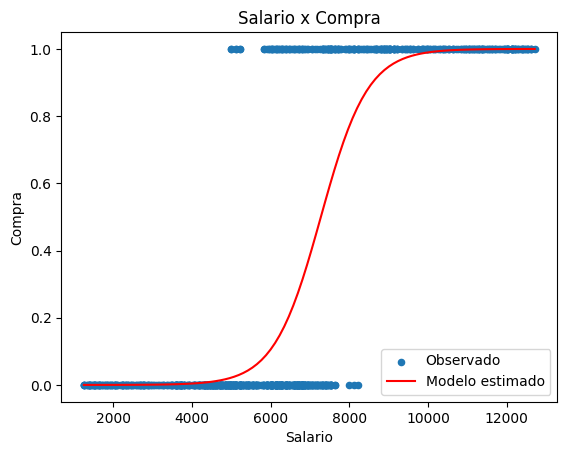

In [31]:
# Questao 5 (parte 2)
# Grafico de dispersao - conjunto de teste
import matplotlib.pyplot as plt
dados_conc.plot.scatter(x="salario", y= "compra", label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(dados_conc['salario'].min(),
                     dados_conc['salario'].max(),
                     100).reshape(-1, 1)
y_prev = modelo_estimado.predict_proba(X = sm.add_constant(x_prev))[:, 1]

plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
# Rotulos e titulo
plt.xlabel("Salario")
plt.ylabel("Compra")
plt.title('Salario x Compra')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()